In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("disney_plus_titles.csv")

# Show the shape of the data
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Show the first 5 rows
df.head()


Rows: 1450, Columns: 12


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [2]:
# Check missing values
df.isnull().sum()


show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [4]:
df['date_added'] = pd.to_datetime(df['date_added'])


In [5]:
# Fill missing director, cast, country with "Unknown"
df['director'].fillna("Unknown", inplace=True)
df['cast'].fillna("Unknown", inplace=True)
df['country'].fillna("Unknown", inplace=True)

# Fill missing rating with mode (most common rating)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# Fill missing date_added with mode (most common date)
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)


C:\Users\shash\AppData\Local\Temp\ipykernel_22272\2983498956.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna("Unknown", inplace=True)
C:\Users\shash\AppData\Local\Temp\ipykernel_22272\2983498956.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [6]:
# Create two new columns from duration
df['duration_int'] = df['duration'].str.extract('(\d+)').astype(int)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')


In [7]:
# Confirm no missing values
print(df.isnull().sum())

# Check new duration columns
df[['duration', 'duration_int', 'duration_type']].head()


show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
duration_int     0
duration_type    0
dtype: int64


,duration,duration_int,duration_type
0,23 min,23,min
1,91 min,91,min
2,23 min,23,min
3,41 min,41,min
4,1 Season,1,Season


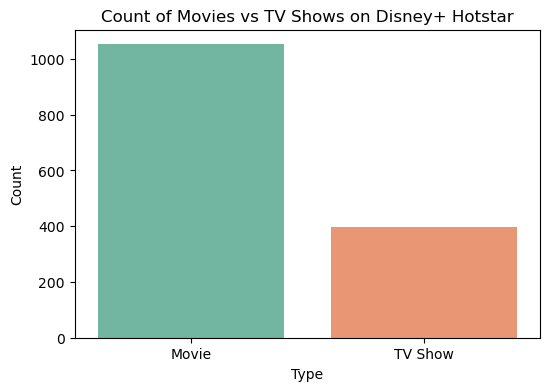

In [11]:
#Count of Movies vs TV Shows
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Count of Movies vs TV Shows on Disney+ Hotstar')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


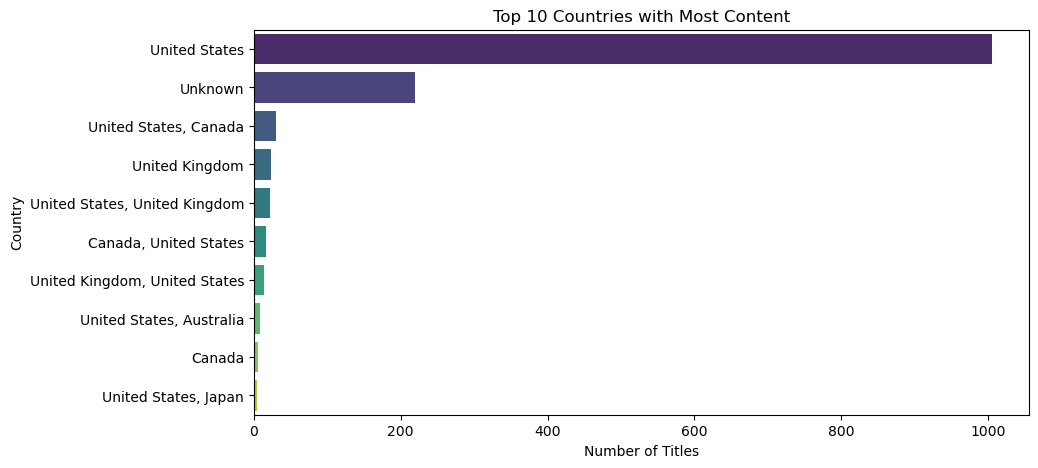

In [12]:
#Content Count by Country (Top 10)
plt.figure(figsize=(10,5))
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


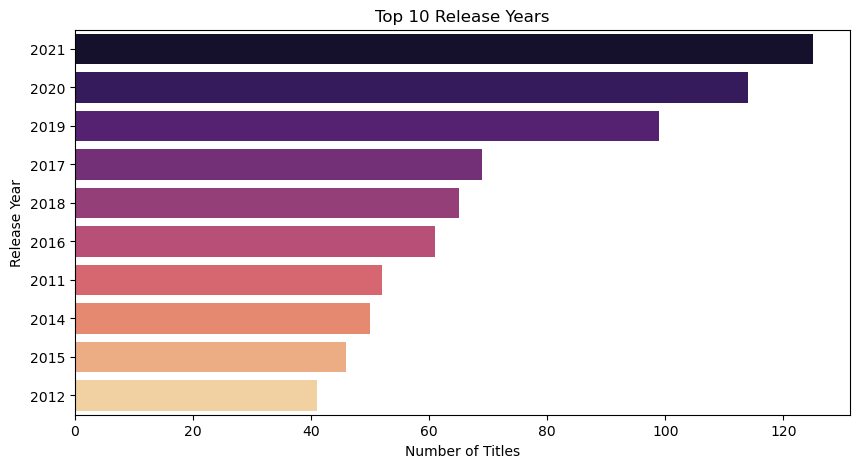

In [13]:
#Releases per Year (Trend Analysis)
plt.figure(figsize=(10,5))
sns.countplot(data=df, y='release_year', order=df['release_year'].value_counts().index[:10], palette='magma')
plt.title('Top 10 Release Years')
plt.xlabel('Number of Titles')
plt.ylabel('Release Year')
plt.show()


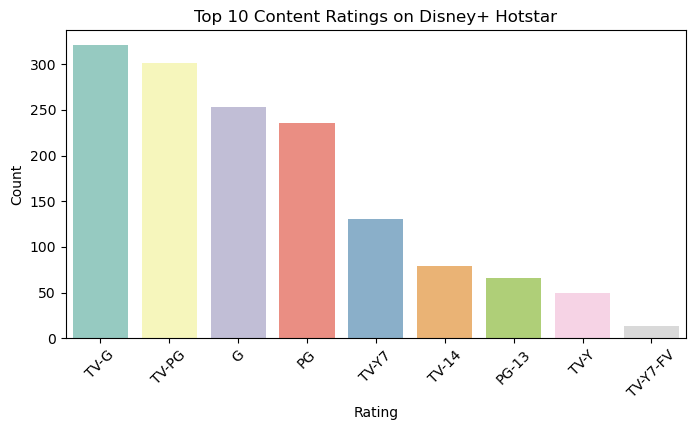

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index[:10], palette='Set3')
plt.title('Top 10 Content Ratings on Disney+ Hotstar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


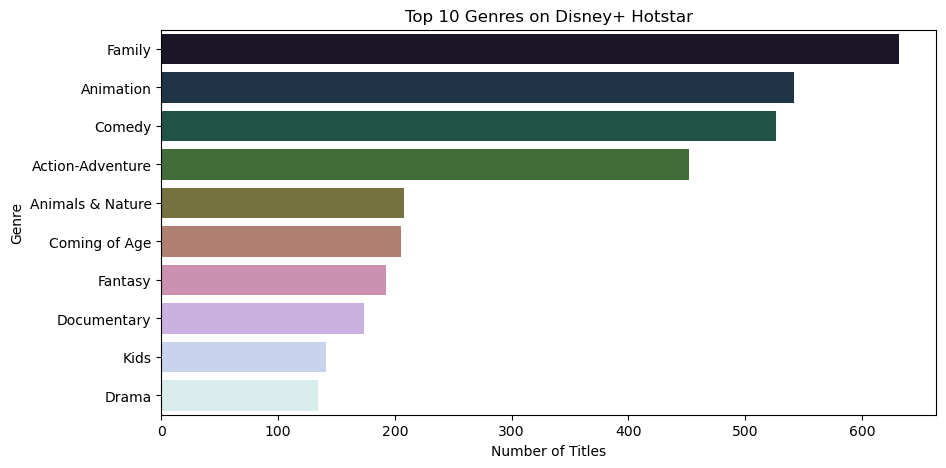

In [15]:
plt.figure(figsize=(10,5))
genre_series = df['listed_in'].str.split(', ').explode()
top_genres = genre_series.value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='cubehelix')
plt.title('Top 10 Genres on Disney+ Hotstar')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


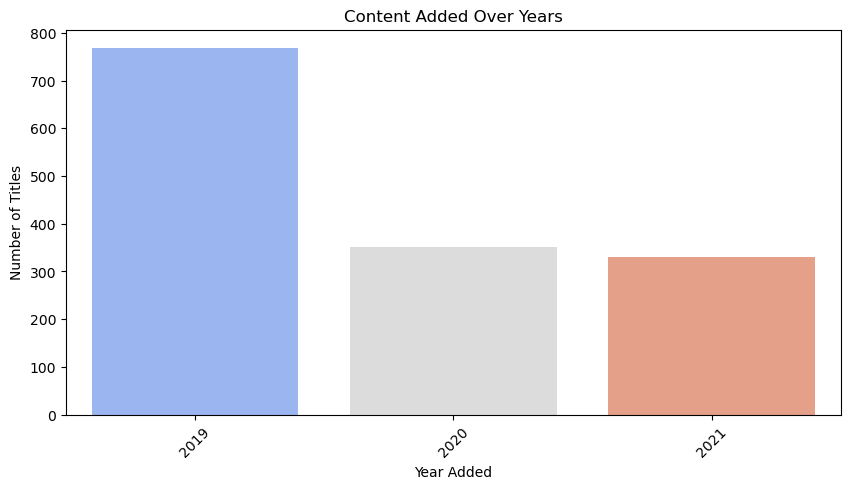

In [16]:
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='year_added', palette='coolwarm')
plt.title('Content Added Over Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


### Tableau Dashboard (Disney+ Hotstar)

In [17]:
# Export cleaned data to CSV
df.to_csv("disney_plus_cleaned.csv", index=False)
